# 📊 AI-Generated Exploration of DANDI Dataset 001366

**Dandiset Title:** Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification

**Dataset ID:** 001366 (Version: draft)

**Citation:** Ranjan, Aditya; Wong, Devin T.; et al. (2025). Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification (Version draft) [Data set]. DANDI Archive.  
https://dandiarchive.org/dandiset/001366/draft

---

**Description:** This dataset contains *in vivo* movies of mouse cortical surface vessels. The focus is on quantifying vessel diameters and pulsatility using multiple approaches (Radon transform, FWHM-based methods, etc.).

---

**Contributors:** Yue Zhao, Aditya Ranjan, Devin T. Wong, Qinwen Huang, Hashmat Ghanizada, Maiken Nedergaard, Douglas H. Kelley, Kimberly A. S. Boster, NIH, US Army

---

## ⚠️ Important Notice
This notebook was **automatically generated by an AI tool using dandi-notebook-gen**. It has **not been manually verified** end-to-end.  
**Please carefully verify all analyses and results before relying on them.**

For best use, ensure required packages are installed: `pynwb`, `h5py`, `remfile`, `numpy`, `matplotlib`.

## About this Dandiset
This Dandiset contains:
- High bit-depth movies (~9,500 frames per file)
- Acquired *in vivo* under microscope, focusing on major pial vessels
- Rich metadata including animal details, acquisition parameters
- Designed to enable vessel diameter quantification, pulsatility assessment

## Access the Dandiset with the DANDI API

In [1]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001366")
assets = list(dandiset.get_assets())
print(f"Total assets in dandiset 001366: {len(assets)}")
for asset in assets:
    print(asset.path)

Total assets in dandiset 001366: 2
sub-F15/sub-F15_ses-F15BC-19102023_image.nwb
sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb


## Load Example NWB File Remotely
We will load a smaller example NWB (~400MB) containing an imaging session:

**Asset path:** `sub-F15/sub-F15_ses-F15BC-19102023_image.nwb`

> Note: Loading remotely can be slow; here we only load and analyze the first 100 frames for illustration.

In [2]:
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/"
file_rf = remfile.File(url)
f = h5py.File(file_rf, 'r')
io = pynwb.NWBHDF5IO(file=f)
nwb = io.read()

print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Age: {nwb.subject.age}")
print(f"Keywords: {list(nwb.keywords[:])}")
print(f"Available acquisitions: {list(nwb.acquisition.keys())}")

Session description: a wild-type mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
Session start time: 2023-10-19 02:00:00-04:00
Subject ID: F15
Species: Mus musculus
Sex: F
Age: P9W/P16W
Keywords: ['Vessel diameter, Radon transform, full width at half maximum, vessel pulsation, image analysis']
Available acquisitions: ['Movies']


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Explore Movie Data
The `"Movies"` acquisition contains a 16-bit grayscale time series:
- **Shape:** `(9553 frames, 214 height, 132 width)`
- **Frame rate:** 54.47 Hz
- **Description:** 16-bit grayscale movie of a pial vessel

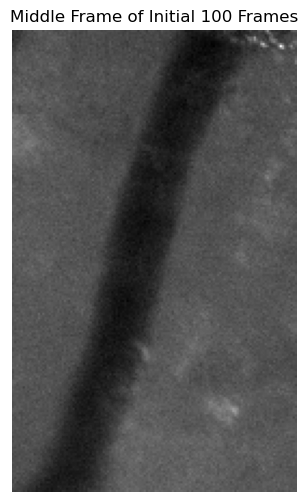

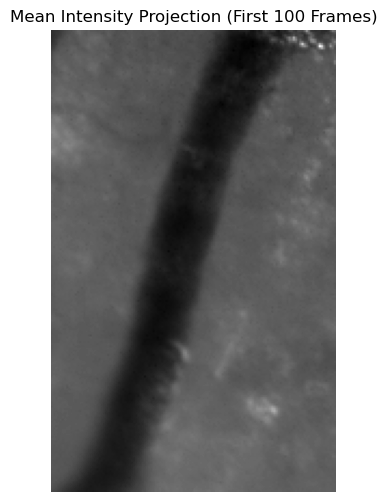

In [3]:
img_series = nwb.acquisition['Movies']
data = img_series.data  # h5py Dataset (remote)
n_frames = data.shape[0]
subset_stop = min(100, n_frames)  # load first 100 frames only
frames = data[0:subset_stop, :, :]

import numpy as np
import matplotlib.pyplot as plt

# Single middle frame
middle_frame_idx = subset_stop // 2
middle_frame = frames[middle_frame_idx, :, :]

plt.figure(figsize=(6, 6))
plt.imshow(middle_frame, cmap='gray')
plt.title('Middle Frame of Initial 100 Frames')
plt.axis('off')
plt.savefig('middle_frame_notebook.png', bbox_inches='tight')
plt.show()

# Mean intensity projection
mean_proj = np.mean(frames, axis=0)

plt.figure(figsize=(6, 6))
plt.imshow(mean_proj, cmap='gray')
plt.title('Mean Intensity Projection (First 100 Frames)')
plt.axis('off')
plt.savefig('mean_projection_notebook.png', bbox_inches='tight')
plt.show()

The above images respectively display:
- **Single Frame:** reveals the approximate vessel anatomy in one timepoint
- **Mean Projection:** averages over 100 frames, enhancing vessel contrast and reducing noise

> Both are useful for identifying vessel locations.  
> Note that more advanced segmentation or quantification is possible but beyond this initial exploration.

## Accessing Metadata Fields
Here are some examples how to access common metadata in your analysis:

In [4]:
print("Experiment description:", nwb.experiment_description)
print("Session ID:", nwb.session_id)
print("Institution:", nwb.institution)
subject = nwb.subject
print("Age:", subject.age)
print("Description:", subject.description)
print("Species:", subject.species)
print("Sex:", subject.sex)
print("Strain:", subject.strain)

Experiment description: Vessel diameter and pulsatility measurement.
Session ID: F15BC-19102023
Institution: University of Copenhagen
Age: P9W/P16W
Description: wild-type mouse
Species: Mus musculus
Sex: F
Strain: C57BL/6J


## Summary
This notebook demonstrated:

- How to use the DANDI API to access this Dandiset and list assets
- How to load NWB files *remotely*
- How to quickly extract metadata and identify key data components (movies)
- How to load and visualize a subset of movie frames, generating publication-quality vessel images
- Pointers towards further quantitative vessel analysis, such as diameter extraction or temporal pulsatility measurement

---

**Remember:** This notebook is a starting point. For robust quantitative results, ensure thorough verification, adopt appropriate processing pipelines, and perform necessary statistical analyses.

---

**Generated automatically using dandi-notebook-gen**  
_(Last updated draft version)_

In [5]:
# Close remote file handle when done
io.close()
file_rf.close()